In [1]:
import networkx as nx
from import_siouxroads import import_draw_roads
from import_literature1976 import import_draw_literature
import importlib

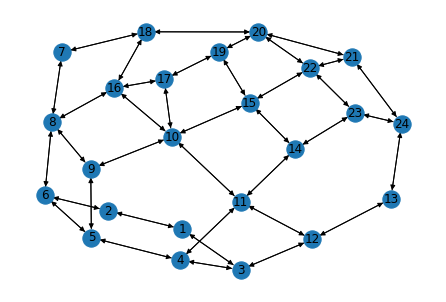

In [2]:
G_roads = import_draw_roads(True)

/home/anton/MsC/semester2/Special Topics/special-topic-cse/read-datasets/import_literature1976.py:37: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


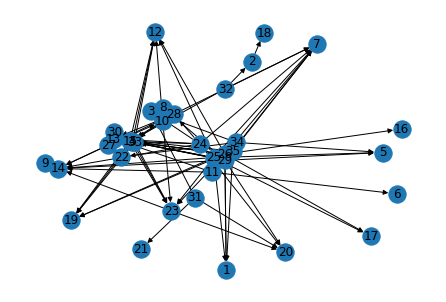

In [3]:
G_lit = import_draw_literature(True)

In [4]:
SCC_roads = nx.strongly_connected_components(G_roads)
SCC_lit = nx.strongly_connected_components(G_lit)

In [5]:
print('Strongly connected components in roads network')
for component in SCC_roads:
    print(component)

Strongly connected components in roads network
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


#### Since there is no SCC with only one node there cannot be any leader. This conclusion is in agreement with fraction of leader nodes from paper F=0.

In [6]:
print('Strongly connected components in literature network')
for component in SCC_lit:
    print(component)

Strongly connected components in literature network
{1}
{18}
{2}
{12}
{9}
{14}
{20}
{23}
{10, 3}
{19}
{4}
{5}
{6}
{7}
{8}
{13}
{11}
{15}
{16}
{17}
{21}
{27}
{22}
{28}
{24}
{25}
{26}
{29}
{30}
{31}
{32}
{33}
{34}
{35}


#### These are the strongly connected componentes, a necessary condition for being a leader node. Moreover, we have to check which of the single node SCC have outer degree = 0. Note: from the paper we know that fraction of leader nodes F=0.34.

In [7]:
G_lit.number_of_nodes()

35

In [8]:
G_lit.degree()

DiDegreeView({1: 4, 2: 2, 3: 5, 4: 7, 5: 3, 6: 1, 7: 7, 8: 2, 9: 1, 10: 6, 11: 3, 12: 6, 13: 9, 14: 8, 15: 12, 16: 1, 17: 2, 18: 1, 19: 5, 20: 4, 21: 1, 22: 2, 23: 8, 24: 7, 25: 10, 26: 10, 27: 3, 28: 6, 29: 8, 30: 2, 31: 3, 32: 3, 33: 4, 34: 3, 35: 3})

Adjacency Matrix Representation: If a directed graph G consists of n vertices then the adjacency matrix of a graph is an n x n matrix A = $[a_{ij}]$ and defined by. If there exists an edge between vertex $V_i$ and $V_j$, with $V_i$ as initial vertex and $V_j$ as a final vertex, then the value of $a_{ij}=1$.

Hence, we could easily calculate the outer degree of node $i$ just by summing the elements of row $i$. (But there is already implemented method in Networkx library)

In [9]:
G_lit.out_degree()

OutDegreeView({1: 0, 2: 1, 3: 1, 4: 3, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 3, 11: 3, 12: 0, 13: 1, 14: 1, 15: 4, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 1, 23: 2, 24: 7, 25: 10, 26: 10, 27: 2, 28: 5, 29: 8, 30: 2, 31: 3, 32: 3, 33: 4, 34: 3, 35: 3})

In [10]:
import hierarchy as H

In [11]:
H.leader_nodes(G_lit)

[1, 18, 12, 9, 20, 19, 5, 6, 7, 16, 17, 21]

In [14]:
len(H.leader_nodes(G_lit))/G_lit.number_of_nodes()

0.34285714285714286

In [18]:
dict(nx.all_pairs_shortest_path(G_lit))

{1: {1: [1]},
 2: {2: [2], 18: [2, 18]},
 3: {3: [3],
  10: [3, 10],
  12: [3, 10, 12],
  23: [3, 10, 23],
  14: [3, 10, 23, 14],
  20: [3, 10, 23, 20],
  9: [3, 10, 23, 14, 9]},
 4: {4: [4],
  12: [4, 12],
  19: [4, 19],
  23: [4, 23],
  14: [4, 23, 14],
  20: [4, 23, 20],
  9: [4, 23, 14, 9]},
 5: {5: [5]},
 6: {6: [6]},
 7: {7: [7]},
 8: {8: [8],
  10: [8, 10],
  12: [8, 10, 12],
  23: [8, 10, 23],
  3: [8, 10, 3],
  14: [8, 10, 23, 14],
  20: [8, 10, 23, 20],
  9: [8, 10, 23, 14, 9]},
 9: {9: [9]},
 10: {10: [10],
  12: [10, 12],
  23: [10, 23],
  3: [10, 3],
  14: [10, 23, 14],
  20: [10, 23, 20],
  9: [10, 23, 14, 9]},
 11: {11: [11],
  6: [11, 6],
  13: [11, 13],
  14: [11, 14],
  4: [11, 13, 4],
  9: [11, 14, 9],
  12: [11, 13, 4, 12],
  19: [11, 13, 4, 19],
  23: [11, 13, 4, 23],
  20: [11, 13, 4, 23, 20]},
 12: {12: [12]},
 13: {13: [13],
  4: [13, 4],
  12: [13, 4, 12],
  19: [13, 4, 19],
  23: [13, 4, 23],
  14: [13, 4, 23, 14],
  20: [13, 4, 23, 20],
  9: [13, 4, 23, 14, 9